In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
import random
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
electronics_data = pd.read_csv("/content/drive/My Drive/Attribution Model Assignment/ratings_Electronics.csv.zip",names=['UserId', 'ProductId','Rating','Timestamp'], sep=',', compression='zip')




In [5]:
electronics_data.head()

,UserId,ProductId,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [0]:
electronics_data=electronics_data.iloc[:10485,0:]

In [7]:
electronics_data.shape

(10485, 4)

In [8]:
electronics_data.dtypes

UserId        object
ProductId     object
Rating       float64
Timestamp      int64
dtype: object

In [0]:
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10485 entries, 0 to 10484
Data columns (total 4 columns):
UserId       10485 non-null object
ProductId    10485 non-null object
Rating       10485 non-null float64
Timestamp    10485 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 327.8+ KB


In [0]:
# Adding column Prouct_price to the DataFrame

#electronics_data['Product_Price'] = np.random.randint(15,500,size=(len(electronics_data)))
#electronics_data
#print('Min price is: %d' %(electronics_data.Product_Price.min()))
#print('Max price is: %d' %(electronics_data.Product_Price.max()))

In [0]:
# Adding column 'Snack_Sub_Name' to the DataFrame

#snack_sub_name = { 'Snackfair', 'Snakku', 'Love With Food', 'Candy Club', 'NatureBox', 'SnackNation', 'ZenPop', 'Yummy Bazaar World Sampler', 'FitSnack', 'Bokksu', 'MunchPak', 'Keto Krate', 'Universal Yums', 'Vegan Cuts Snack Box', 'TokyoTreat', 'Try the World Snack'}

#electronics_data['Snack_Sub_Name'] = np.random.choice(list(snack_sub_name), len(electronics_data))
#electronics_data

In [9]:
Price = {'Snackfair': 15.50, 'Snakku':38.95, 'Love With Food':9.99, 'Candy Club':39.99, 'NatureBox':5, 'SnackNation':9.99, 'ZenPop':24.50, 'Yummy Bazaar World Sampler':9.95, 'FitSnack':19.90, 'Bokksu':39, 'MunchPak':9.95, 'Keto Krate':34.95, 'Universal Yums':13, 'Vegan Cuts Snack Box':22.95, 'TokyoTreat':22.50, 'Try the World Snack':19}
electronics_data['Snack_Sub_Name'] = np.random.choice(list(Price), len(electronics_data))
electronics_data['Price'] = electronics_data['Snack_Sub_Name'].map(Price)
electronics_data.head(190)

,UserId,ProductId,Rating,Timestamp,Snack_Sub_Name,Price
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200,Universal Yums,13.00
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,Love With Food,9.99
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,Love With Food,9.99
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,FitSnack,19.90
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,Try the World Snack,19.00
...,...,...,...,...,...,...
185,A36MQBNADRH8YY,0972683275,5.0,1405641600,Candy Club,39.99
186,A3SRXMPLAEZ6DP,0972683275,4.0,1405987200,Snackfair,15.50
187,A20XXTXWF2TCPY,0972683275,5.0,1405123200,Candy Club,39.99
188,AOZZ0CTG5RMW1,0972683275,4.0,1302912000,Yummy Bazaar World Sampler,9.95


In [10]:
# Adding Product_ID for each snack subcription plan

electronics_data['Product_ID'] = electronics_data.Snack_Sub_Name.map({'Snackfair': 13279300 , 'Snakku':321732944, 'Love With Food':439886341, 'Candy Club':511189877, 'NatureBox':528881469, 'SnackNation':558835155, 'ZenPop':594012015, 'Yummy Bazaar World Sampler':594451647, 'FitSnack':594477670, 'Bokksu':594481813, 'MunchPak':594481902, 'Keto Krate':594482127, 'Universal Yums':594511488, 'Vegan Cuts Snack Box':899336795, 'TokyoTreat':970407998, 'Try the World Snack':972683275})
electronics_data

,UserId,ProductId,Rating,Timestamp,Snack_Sub_Name,Price,Product_ID
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200,Universal Yums,13.00,594511488
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,Love With Food,9.99,439886341
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,Love With Food,9.99,439886341
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,FitSnack,19.90,594477670
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,Try the World Snack,19.00,972683275
...,...,...,...,...,...,...,...
10480,A3KIX0N7AJOX68,B00000J1SC,2.0,1378684800,Universal Yums,13.00,594511488
10481,A3JPDP4JRCART7,B00000J1SC,5.0,1395014400,Try the World Snack,19.00,972683275
10482,A1GZTVDFGF71XM,B00000J1SC,3.0,1374105600,Keto Krate,34.95,594482127
10483,A3LM4LWX9M14BI,B00000J1SC,5.0,1396224000,Universal Yums,13.00,594511488


In [11]:
electronics_data

,UserId,ProductId,Rating,Timestamp,Snack_Sub_Name,Price,Product_ID
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200,Universal Yums,13.00,594511488
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,Love With Food,9.99,439886341
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,Love With Food,9.99,439886341
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,FitSnack,19.90,594477670
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,Try the World Snack,19.00,972683275
...,...,...,...,...,...,...,...
10480,A3KIX0N7AJOX68,B00000J1SC,2.0,1378684800,Universal Yums,13.00,594511488
10481,A3JPDP4JRCART7,B00000J1SC,5.0,1395014400,Try the World Snack,19.00,972683275
10482,A1GZTVDFGF71XM,B00000J1SC,3.0,1374105600,Keto Krate,34.95,594482127
10483,A3LM4LWX9M14BI,B00000J1SC,5.0,1396224000,Universal Yums,13.00,594511488


In [0]:
electronics_data.to_csv('snack_data.csv')

In [12]:
electronics_data.describe()['Rating'].T

count    10485.000000
mean         3.912542
std          1.469024
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [13]:
print('Minimum rating is: %d' %(electronics_data.Rating.min()))
print('Maximum rating is: %d' %(electronics_data.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


In [14]:
#Check for missing values
print('Number of missing values across columns: \n',electronics_data.isnull().sum())

Number of missing values across columns: 
 UserId            0
ProductId         0
Rating            0
Timestamp         0
Snack_Sub_Name    0
Price             0
Product_ID        0
dtype: int64


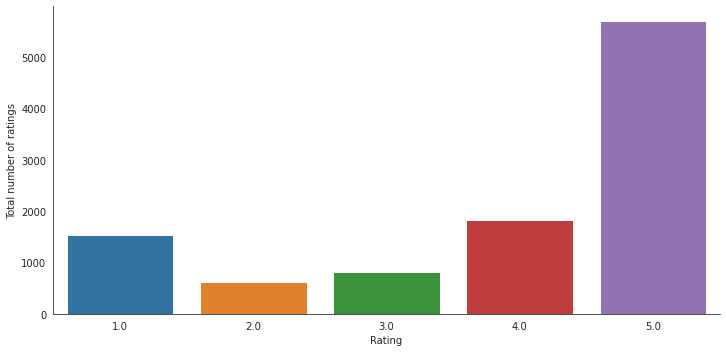

In [15]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=electronics_data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [16]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",electronics_data.shape[0])
print("Total No of Users   :", len(np.unique(electronics_data.UserId)))
print("Total No of products  :", len(np.unique(electronics_data.ProductId)))

Total data 
--------------------------------------------------

Total no of ratings : 10485
Total No of Users   : 10296
Total No of products  : 1340


In [17]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = electronics_data.groupby(by='UserId')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

UserId
A3LDPF5FMB782Z    5
AT8TIN5JKHO2V     5
A2HDTOF8222KN3    4
A1TBH7Z4RK7PRK    4
A2YT1SH4B1PPST    3
Name: Rating, dtype: int64

In [18]:
no_of_rated_products_per_user.describe()

count    10296.000000
mean         1.018357
std          0.153803
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: Rating, dtype: float64

In [19]:
electronics_data.head()

,UserId,ProductId,Rating,Timestamp,Snack_Sub_Name,Price,Product_ID
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200,Universal Yums,13.00,594511488
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,Love With Food,9.99,439886341
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,Love With Food,9.99,439886341
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,FitSnack,19.90,594477670
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,Try the World Snack,19.00,972683275


In [0]:
electronics_data = electronics_data.rename(columns={'Product_ID': 'Snack Subscription ID'}, index={'ONE': 'one'})




In [21]:
electronics_data.head()

,UserId,ProductId,Rating,Timestamp,Snack_Sub_Name,Price,Snack Subscription ID
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200,Universal Yums,13.00,594511488
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,Love With Food,9.99,439886341
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,Love With Food,9.99,439886341
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,FitSnack,19.90,594477670
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,Try the World Snack,19.00,972683275


In [22]:
electronics_data.Snack_Sub_Name.unique()

array(['Universal Yums', 'Love With Food', 'FitSnack',
       'Try the World Snack', 'ZenPop', 'Snackfair', 'TokyoTreat',
       'SnackNation', 'Snakku', 'Yummy Bazaar World Sampler', 'NatureBox',
       'MunchPak', 'Keto Krate', 'Bokksu', 'Candy Club',
       'Vegan Cuts Snack Box'], dtype=object)

In [23]:
Calories = {'Snackfair': 387, 'Snakku':287, 'Love With Food':429, 'Candy Club':529, 'NatureBox':229, 'SnackNation':240, 'ZenPop':340, 'Yummy Bazaar World Sampler':440, 'FitSnack':240, 'Bokksu':340, 'MunchPak':540, 'Keto Krate':440, 'Universal Yums':349, 'Vegan Cuts Snack Box':315, 'TokyoTreat':520, 'Try the World Snack':190}
electronics_data['Snack_Sub_Name'] = np.random.choice(list(Calories), len(electronics_data))
electronics_data['Calories Kcal'] = electronics_data['Snack_Sub_Name'].map(Calories)
electronics_data.head(190)

,UserId,ProductId,Rating,Timestamp,Snack_Sub_Name,Price,Snack Subscription ID,Calories Kcal
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200,NatureBox,13.00,594511488,229
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,MunchPak,9.99,439886341,540
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,Snackfair,9.99,439886341,387
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,Try the World Snack,19.90,594477670,190
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,Candy Club,19.00,972683275,529
...,...,...,...,...,...,...,...,...
185,A36MQBNADRH8YY,0972683275,5.0,1405641600,Yummy Bazaar World Sampler,39.99,511189877,440
186,A3SRXMPLAEZ6DP,0972683275,4.0,1405987200,SnackNation,15.50,13279300,240
187,A20XXTXWF2TCPY,0972683275,5.0,1405123200,Vegan Cuts Snack Box,39.99,511189877,315
188,AOZZ0CTG5RMW1,0972683275,4.0,1302912000,Snakku,9.95,594451647,287


In [24]:
Protien = {'Snackfair': 8, 'Snakku':7, 'Love With Food':9, 'Candy Club':5, 'NatureBox':9, 'SnackNation':4, 'ZenPop':3, 'Yummy Bazaar World Sampler':12, 'FitSnack':14, 'Bokksu':12, 'MunchPak':9, 'Keto Krate':15, 'Universal Yums':12, 'Vegan Cuts Snack Box':11, 'TokyoTreat':7, 'Try the World Snack':8}
electronics_data['Snack_Sub_Name'] = np.random.choice(list(Calories), len(electronics_data))
electronics_data['Protien g'] = electronics_data['Snack_Sub_Name'].map(Protien)
electronics_data.head(190)

,UserId,ProductId,Rating,Timestamp,Snack_Sub_Name,Price,Snack Subscription ID,Calories Kcal,Protien g
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200,FitSnack,13.00,594511488,229,14
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,FitSnack,9.99,439886341,540,14
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,Vegan Cuts Snack Box,9.99,439886341,387,11
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,Snakku,19.90,594477670,190,7
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,ZenPop,19.00,972683275,529,3
...,...,...,...,...,...,...,...,...,...
185,A36MQBNADRH8YY,0972683275,5.0,1405641600,Snakku,39.99,511189877,440,7
186,A3SRXMPLAEZ6DP,0972683275,4.0,1405987200,Vegan Cuts Snack Box,15.50,13279300,240,11
187,A20XXTXWF2TCPY,0972683275,5.0,1405123200,Bokksu,39.99,511189877,315,12
188,AOZZ0CTG5RMW1,0972683275,4.0,1302912000,Vegan Cuts Snack Box,9.95,594451647,287,11


In [38]:
Fat = {'Snackfair': 5, 'Snakku':15, 'Love With Food':19, 'Candy Club':13, 'NatureBox':8, 'SnackNation':7, 'ZenPop':13, 'Yummy Bazaar World Sampler':19, 'FitSnack':4, 'Bokksu':9, 'MunchPak':18, 'Keto Krate':20, 'Universal Yums':11, 'Vegan Cuts Snack Box':9, 'TokyoTreat':17, 'Try the World Snack':16}
electronics_data['Snack_Sub_Name'] = np.random.choice(list(Calories), len(electronics_data))
electronics_data['Fat g'] = electronics_data['Snack_Sub_Name'].map(Fat)
electronics_data.head(190)

,UserId,ProductId,Rating,Timestamp,Snack_Sub_Name,Price,Snack Subscription ID,Calories Kcal,Protien g,Fat g
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200,Try the World Snack,13.00,594511488,229,14,16
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,Yummy Bazaar World Sampler,9.99,439886341,540,14,19
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,Love With Food,9.99,439886341,387,11,19
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,Candy Club,19.90,594477670,190,7,13
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,Keto Krate,19.00,972683275,529,3,20
...,...,...,...,...,...,...,...,...,...,...
185,A36MQBNADRH8YY,0972683275,5.0,1405641600,TokyoTreat,39.99,511189877,440,7,17
186,A3SRXMPLAEZ6DP,0972683275,4.0,1405987200,Try the World Snack,15.50,13279300,240,11,16
187,A20XXTXWF2TCPY,0972683275,5.0,1405123200,Snackfair,39.99,511189877,315,12,5
188,AOZZ0CTG5RMW1,0972683275,4.0,1302912000,Yummy Bazaar World Sampler,9.95,594451647,287,11,19


In [39]:
electronics_data.head()

,UserId,ProductId,Rating,Timestamp,Snack_Sub_Name,Price,Snack Subscription ID,Calories Kcal,Protien g,Fat g
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200,Try the World Snack,13.00,594511488,229,14,16
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,Yummy Bazaar World Sampler,9.99,439886341,540,14,19
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,Love With Food,9.99,439886341,387,11,19
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,Candy Club,19.90,594477670,190,7,13
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,Keto Krate,19.00,972683275,529,3,20


In [0]:
electronics_data.to_csv(r'SnackBars.csv', index = False, header=True)

In [0]:
electronics_data['Serving Size g'] = '100'

In [0]:
electronics_data.head()

,UserId,Rating,Timestamp,Snack_Sub_Name,Price,Snack Subscription ID,Calories Kcal,Protien g,Fat g
0,AKM1MP6P0OYPR,5.0,1365811200,MunchPak,22.50,970407998,429,4,18
1,A2CX7LUOHB2NDG,5.0,1341100800,Candy Club,22.95,899336795,520,3,13
2,A2NWSAGRHCP8N5,1.0,1367193600,NatureBox,9.95,594481902,315,14,8
3,A2WNBOD3WNDNKT,3.0,1374451200,Bokksu,39.00,594481813,540,8,9
4,A1GI0U4ZRJA8WN,1.0,1334707200,MunchPak,9.95,594451647,520,3,18


In [0]:
del electronics_data['ProductId']

In [0]:
Calories = {'Snackfair': 387, 'Snakku':287, 'Love With Food':429, 'Candy Club':529, 'NatureBox':229, 'SnackNation':240, 'ZenPop':340, 'Yummy Bazaar World Sampler':440, 'FitSnack':240, 'Bokksu':340, 'MunchPak':540, 'Keto Krate':440, 'Universal Yums':349, 'Vegan Cuts Snack Box':315, 'TokyoTreat':520, 'Try the World Snack':190}
electronics_data['Snack_Sub_Name'] = np.random.choice(list(Calories), len(electronics_data))
electronics_data['Calories Kcal'] = electronics_data['Snack_Sub_Name'].map(Calories)
electronics_data.head(190)

,UserId,Rating,Timestamp,Snack_Sub_Name,Price,Snack Subscription ID,Calories Kcal,Protien g,Fat g,Serving Size g
0,AKM1MP6P0OYPR,5.0,1365811200,Love With Food,39.00,594481813,429,12,16,100
1,A2CX7LUOHB2NDG,5.0,1341100800,TokyoTreat,5.00,528881469,520,15,20,100
2,A2NWSAGRHCP8N5,1.0,1367193600,Keto Krate,39.99,511189877,440,8,15,100
3,A2WNBOD3WNDNKT,3.0,1374451200,MunchPak,38.95,321732944,540,7,18,100
4,A1GI0U4ZRJA8WN,1.0,1334707200,Universal Yums,39.99,511189877,349,9,9,100
...,...,...,...,...,...,...,...,...,...,...
185,A36MQBNADRH8YY,5.0,1405641600,Candy Club,13.00,594511488,529,12,13,100
186,A3SRXMPLAEZ6DP,4.0,1405987200,Yummy Bazaar World Sampler,22.50,970407998,440,12,9,100
187,A20XXTXWF2TCPY,5.0,1405123200,Snakku,9.99,558835155,287,14,4,100
188,AOZZ0CTG5RMW1,4.0,1302912000,MunchPak,9.99,439886341,540,5,18,100


In [0]:
electronics_data.to_csv ('to_be_trained.csv', index = False, header=True)

In [32]:
 !pip install papermill

     |████████████████████████████████| 102kB 3.2MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 747kB 3.7MB/s 


In [33]:
!pip install -q "tensorflow>=1.7" "tensorflow-hub" "imageio"

ERROR: streamlit 0.57.1 has requirement cachetools>=4.0, but you'll have cachetools 3.1.1 which is incompatible.


In [34]:
!pip install "git+https://github.com/microsoft/recommenders"

  Cloning https://github.com/microsoft/recommenders to /tmp/pip-req-build-vmjwzu2a
  Running command git clone -q https://github.com/microsoft/recommenders /tmp/pip-req-build-vmjwzu2a
  Created wheel for reco-utils: filename=reco_utils-2019.9-cp36-none-any.whl size=131250 sha256=0afd7effce86b7872b164936ae5afafe0b7c25d5db2b8813f1d527fac5c77d31
  Stored in directory: /tmp/pip-ephem-wheel-cache-hhreso98/wheels/b4/1c/70/c3f6005781b2b5a3370ec55bdd75c10ed1b07456bdfb1a0524
Successfully built reco-utils


In [0]:
#load libraries

from __future__ import print_function
from __future__ import absolute_import
from __future__ import division

# set the environment path to find Recommenders
import sys
sys.path.append("../../")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import papermill as pm

from reco_utils.recommender.rbm.rbm import RBM
from reco_utils.dataset.python_splitters import numpy_stratified_split
from reco_utils.dataset.sparse import AffinityMatrix


from reco_utils.dataset import movielens
from reco_utils.evaluation.python_evaluation import map_at_k, ndcg_at_k, precision_at_k, recall_at_k

In [0]:
electronics_data = pd.read_csv('SnackBars.csv')

In [0]:
electronics_data.head()

,UserId,Rating,Timestamp,Snack_Sub_Name,Price,Snack Subscription ID,Calories Kcal,Protien g,Fat g
0,AKM1MP6P0OYPR,5.0,1365811200,MunchPak,22.50,970407998,429,4,18
1,A2CX7LUOHB2NDG,5.0,1341100800,Candy Club,22.95,899336795,520,3,13
2,A2NWSAGRHCP8N5,1.0,1367193600,NatureBox,9.95,594481902,315,14,8
3,A2WNBOD3WNDNKT,3.0,1374451200,Bokksu,39.00,594481813,540,8,9
4,A1GI0U4ZRJA8WN,1.0,1334707200,MunchPak,9.95,594451647,520,3,18


In [0]:
# Convert to 32-bit in order to reduce memory consumption 
electronics_data.loc[:, 'Rating'] = electronics_data['Rating'].astype(np.int32)
electronics_data.loc[:, 'Price'] = electronics_data['Price'].astype(np.int32) 

In [0]:

#to use standard names across the analysis 
# header = {
#         "col_user": "userID",
#         #"col_Product": "Product_ID",
#         "col_snacksubscription": "Snack Subscription ID",
#           "col_Price": "Price",
#         "col_calories": "Calories Kcal",
#          "col_Protien": "Protien g",
#            "col_Price": "Fat g",
#         "col_rating": "Rating",
#     }


header = {
        "col_user": "UserId",
        "col_item": "Snack Subscription ID",
        "col_rating": "Rating",
        #"col_rating": "Price",
    }

#instantiate the sparse matrix generation  
am = AffinityMatrix(DF = electronics_data, **header)

#obtain the sparse matrix 
X = am.gen_affinity_matrix()

In [0]:
electronics_data.dtypes

UserId                   object
Rating                    int32
Timestamp                 int64
Snack_Sub_Name           object
Price                     int32
Snack Subscription ID     int64
Calories Kcal             int64
Protien g                 int64
Fat g                     int64
dtype: object

In [0]:
Xtr, Xtst = numpy_stratified_split(X)

In [0]:
print('train matrix size', Xtr.shape)
print('test matrix size', Xtst.shape)

train matrix size (10296, 16)
test matrix size (10296, 16)


In [0]:
#First we initialize the model class
model = RBM(hidden_units= 600, training_epoch = 30, minibatch_size= 60, keep_prob=0.9,with_metrics =True)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU d

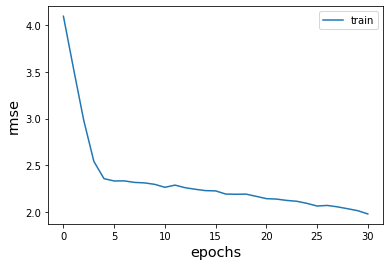

In [0]:
#Model Fit
train_time= model.fit(Xtr, Xtst)

In [0]:
#number of top score elements to be recommended  
K = 10

#Model prediction on the test set Xtst. 
top_k, test_time =  model.recommend_k_items(Xtst)

In [0]:
top_k_df = am.map_back_sparse(top_k, kind = 'prediction')
test_df = am.map_back_sparse(Xtst, kind = 'ratings')

In [0]:
top_k_df.head(20)

,UserId,Snack Subscription ID,prediction
0,A00766851QZZUBOVF4JFT,558835155,0.844025
1,A00766851QZZUBOVF4JFT,439886341,0.775465
2,A00766851QZZUBOVF4JFT,972683275,0.891948
3,A00766851QZZUBOVF4JFT,594482127,0.829014
4,A00766851QZZUBOVF4JFT,594451647,0.808418
5,A00766851QZZUBOVF4JFT,594481813,0.769359
6,A00766851QZZUBOVF4JFT,594012015,0.748198
7,A00766851QZZUBOVF4JFT,321732944,0.754990
8,A00766851QZZUBOVF4JFT,899336795,0.888337
9,A00766851QZZUBOVF4JFT,594477670,0.797180


In [31]:
!pip install streamlit

     |████████████████████████████████| 7.1MB 1.4MB/s 
     |████████████████████████████████| 112kB 31.0MB/s 
     |████████████████████████████████| 522kB 39.4MB/s 
     |████████████████████████████████| 102kB 12.6MB/s 
     |████████████████████████████████| 5.3MB 27.6MB/s 
     |████████████████████████████████| 122kB 43.0MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13449 sha256=bbe24676c9803e917cbdb619d78461bec9e6da54bce810b7aa2ae05b767636da
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for tornado: filename=tornado-5.1.1-cp36-cp36m-linux_x86_64.whl size=462319 sha256=a51bf28def0bd615a311a7847e4fef6824c7fcfb5f9bb8434b48471b85686d0f
  Stored in directory: /root/.cache/pip/wheels/6d/e1/ce/f4ee2fa420cc6b940123c64992b81047816d0a9fad6b879325
  Created wheel for watchdog: filename=watchdog-0.10.2-cp36-none-any.whl size=73605 sha256=95a5b6bd89a4385965b86cf12510ede87d71a3a3d4216

In [0]:
df_train['lat'] = np.nan
df_train['lon'] = np.nan

#del df_train['Country']


In [26]:
df_train.head()

,UserId,Snack Subscription ID,prediction,lat,lon
0,A00766851QZZUBOVF4JFT,13279300,0.851299,39.062691,-77.342987
1,A00766851QZZUBOVF4JFT,594511488,0.755003,39.051234,-77.344729
2,A00766851QZZUBOVF4JFT,594477670,0.866201,39.051660,-77.344723
3,A00766851QZZUBOVF4JFT,899336795,0.783059,39.052546,-77.344712
4,A00766851QZZUBOVF4JFT,594481902,0.678833,39.052131,-77.344504


In [0]:
df_train.groupby(['Snack Subscription ID']).count()

,UserId,prediction,lat,lon
Snack Subscription ID,,,,
13279300,9685,9685,9685,9685
321732944,6888,6888,6888,6888
439886341,8196,8196,8196,8196
511189877,117,117,117,117
528881469,9479,9479,9479,9479
558835155,2039,2039,2039,2039
594012015,9621,9621,9621,9621
594451647,9534,9534,9534,9534
594477670,9617,9617,9617,9617


In [0]:
df_train.iloc[:, 3:5]

,lat,lon
0,39.062691,-77.342987
1,39.051234,-77.344729
2,39.051660,-77.344723
3,39.052546,-77.344712
4,39.052131,-77.344504
...,...,...
102955,38.902201,-77.583019
102956,38.902991,-77.582950
102957,38.904375,-77.582687
102958,38.901904,-77.582740


In [0]:
df_train.to_csv('Trained_output.csv', index = False, header=True)

In [0]:
df_train.shape

(102960, 4)

In [0]:
coordinate = pd.read_csv('/content/Loudoun_Parcel_XY.csv')
coordinate.head()

,OBJECTID,PA_MCPI,POINT_X,POINT_Y,POINT_X_SP,POINT_Y_SP
0,1,1154444000,-77.342987,39.062691,1.181144e+07,7.072137e+06
1,2,2150124000,-77.344729,39.051234,1.181100e+07,7.067958e+06
2,3,2150139000,-77.344723,39.051660,1.181100e+07,7.068114e+06
3,4,2150272000,-77.344712,39.052546,1.181100e+07,7.068437e+06
4,5,2150656000,-77.344504,39.052131,1.181106e+07,7.068286e+06


In [0]:
coordinate=coordinate.iloc[:102960,0:]

In [0]:
coordinate.shape

(102960, 6)

In [0]:
coordinate_list = list(zip(coordinate.POINT_X.values,coordinate.POINT_Y.values))

In [0]:
coordinate = coordinate.rename(columns={"POINT_X":"lat","POINT_Y":"lon"}, errors="raise")

In [0]:
df_train['lat'] = coordinate.iloc[:,3:4]

In [0]:
 df_train['lon'] = coordinate.iloc[:,2:3]

In [0]:
coordinate['POINT_X']

0        -77.342987
1        -77.344729
2        -77.344723
3        -77.344712
4        -77.344504
            ...    
102955   -77.583019
102956   -77.582950
102957   -77.582687
102958   -77.582740
102959   -77.582522
Name: POINT_X, Length: 102960, dtype: float64

In [27]:
# How to run a Dash app in Google Colab

### Install ngrok
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2020-03-29 14:57:58--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 35.168.162.120, 52.20.42.118, 34.196.12.177, ...
Connecting to bin.equinox.io (bin.equinox.io)|35.168.162.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  6.49MB/s    in 2.0s    

2020-03-29 14:58:01 (6.49 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [47]:
get_ipython().system_raw('./ngrok http 8501 &')

### Get the public URL where you can access the Dash app. Copy this URL.
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://0f44077a.ngrok.io


In [48]:
#!streamlit run RDM_visualise.py
!streamlit run Integration.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.221.172.215:8501

Generating the user/item affinity matrix...
Matrix generated, sparseness percentage: 93
  Stopping...


In [44]:
!pip install tensorflow